https://www.digitalocean.com/community/tutorials/normalize-data-in-python

https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python



---



#Step 1: Import Libraries

In [1]:
from sklearn import preprocessing
import pandas as pd
from sklearn.datasets import fetch_california_housing



---



#Step 2: Check Description of California Housing Dataset

In [2]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived



---



#Step 3: Neaten the Dataset for Easier Viewing

In [3]:
def print_neat_dictionary(dictionary):
  """Prints a dictionary in a neat format."""
  for key, value in dictionary.items():
    print(f"\n{key.upper()}:\n\n{value}")

In [4]:
print_neat_dictionary(california_housing)


DATA:

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -12

In [5]:
california_housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32




---



#Step 4: Introducing MinMax Scaler

#MinMaxScaler:
- Most common technique.
- Scales each feature individually
- Values have minimum and maximum value, 0 and 1.`

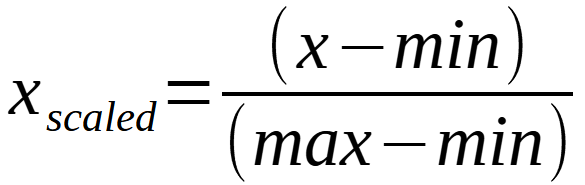

- x is the original feature vector

- x_scaled is the scaled feature vector

- min is the minimum value of the feature vector

- max is the maximum value of the feature vector



---



In [6]:
#bringing in the MinMax Scaler
scaler = preprocessing.MinMaxScaler()

#using MinMax scaler to transform the Dataframe
d = scaler.fit_transform(california_housing.data)


- Note that MinMax scaler transforms FEATURES (aka COLUMNS)
- in other words, they are normalized COLUMN wise, NOT ROW wise
- notice that the values are all between 0~1

In [7]:
#Showing the Dataframe AFTER transformation
minmax_scaled_df = pd.DataFrame(d, columns=california_housing.data.columns)
print(minmax_scaled_df)

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      0.539668  0.784314  0.043512   0.020469    0.008941  0.001499   
1      0.538027  0.392157  0.038224   0.018929    0.067210  0.001141   
2      0.466028  1.000000  0.052756   0.021940    0.013818  0.001698   
3      0.354699  1.000000  0.035241   0.021929    0.015555  0.001493   
4      0.230776  1.000000  0.038534   0.022166    0.015752  0.001198   
...         ...       ...       ...        ...         ...       ...   
20635  0.073130  0.470588  0.029769   0.023715    0.023599  0.001503   
20636  0.141853  0.333333  0.037344   0.029124    0.009894  0.001956   
20637  0.082764  0.313725  0.030904   0.023323    0.028140  0.001314   
20638  0.094295  0.333333  0.031783   0.024859    0.020684  0.001152   
20639  0.130253  0.294118  0.031252   0.024573    0.038790  0.001549   

       Latitude  Longitude  
0      0.567481   0.211155  
1      0.565356   0.212151  
2      0.564293   0.210159  
3      0.564293   0

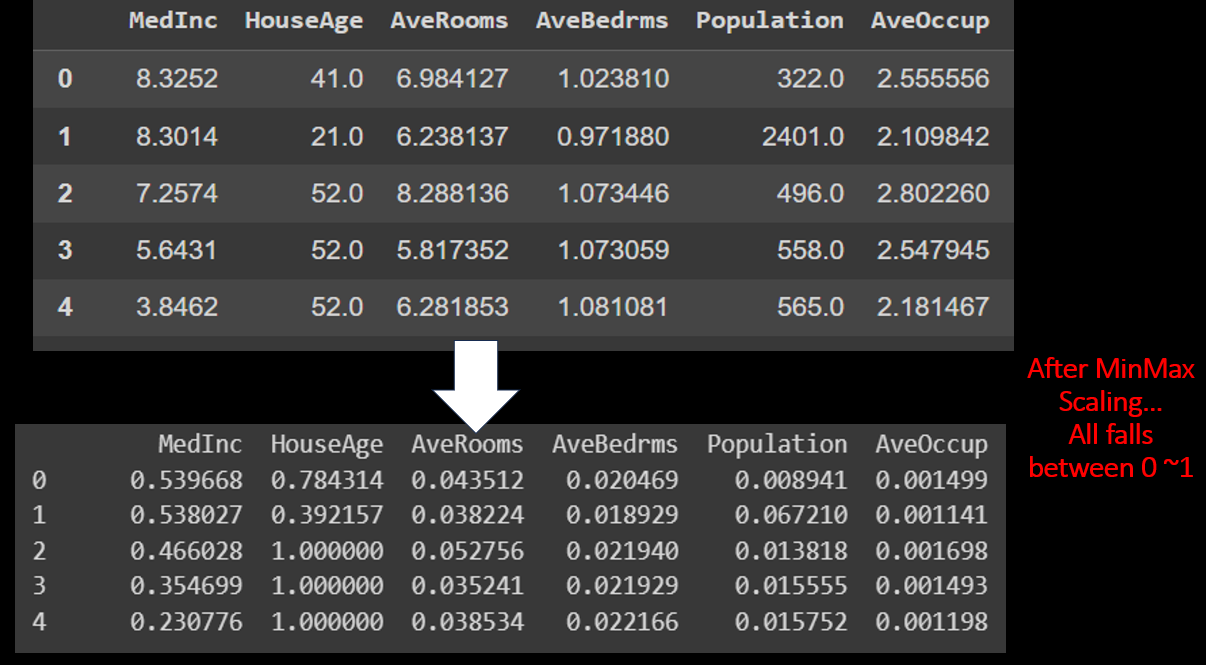



---



#Step 5: Introducing Standard Scaler

##StandardScaler:
- Subtracts the mean from each feature and then divides by the standard deviation.
- Features have a mean of 0 and a standard deviation of 1.

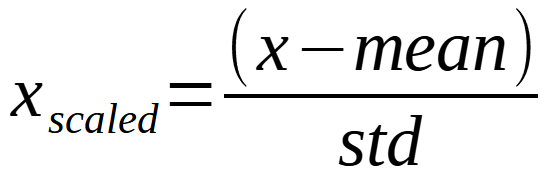

- x is the original feature vector

- x_scaled is the scaled feature vector

- mean is the mean of the feature vector

- std is the standard deviation of the feature vector

In [8]:
from sklearn.preprocessing import StandardScaler

#response = dataset.target

# standardization
d = StandardScaler().fit_transform(california_housing.data)
stdscaler_scaled_df = pd.DataFrame(d, columns=california_housing.data.columns)

print(stdscaler_scaled_df)

         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0      2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597   
1      2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512   
2      1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843   
3      0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329   
4     -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616   
...         ...       ...       ...        ...         ...       ...   
20635 -1.216128 -0.289187 -0.155023   0.077354   -0.512592 -0.049110   
20636 -0.691593 -0.845393  0.276881   0.462365   -0.944405  0.005021   
20637 -1.142593 -0.924851 -0.090318   0.049414   -0.369537 -0.071735   
20638 -1.054583 -0.845393 -0.040211   0.158778   -0.604429 -0.091225   
20639 -0.780129 -1.004309 -0.070443   0.138403   -0.033977 -0.043682   

       Latitude  Longitude  
0      1.052548  -1.327835  
1      1.043185  -1.322844  
2      1.038503  -1.332827  
3      1.038503  -1

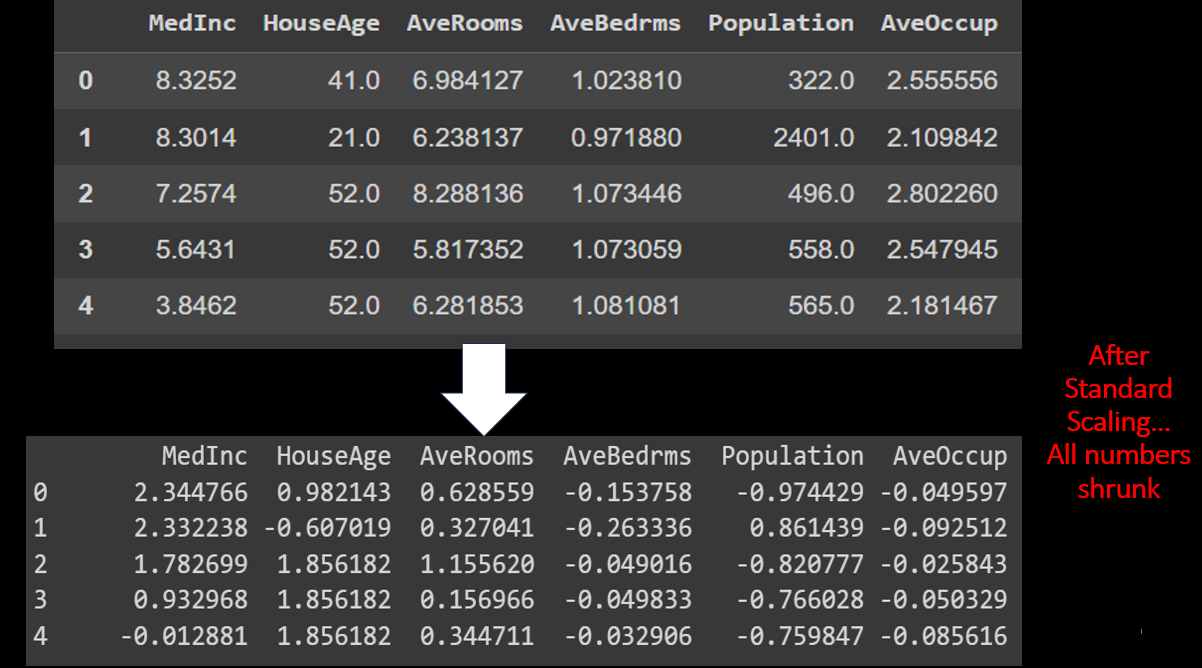



---



#THE END


---

